In [130]:
# Analysis
# 1. Urban drivers made up over three quarters of the total drivers
# 2. Suburban rides made up over one quarter of the total rides
# 3. For the most part, the average fare for rural rides was higher than other city types.
# This could be because rural drives have a farther distance to cover.

In [133]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [134]:
# read the ride_csv into a dataframe
ride_csv = 'raw_data/ride_data.csv'
ride_df = pd.read_csv(ride_csv)
#ride_df.head()

In [135]:
# read the city_csv file into a dataframe
city_csv = 'raw_data/city_data.csv'
city_df = pd.read_csv(city_csv)
#city_df.head()

In [136]:
# Merge the data frames together based on which city is mentioned
merge_table = pd.merge(ride_df, city_df, on = 'city')
merge_table.head()

,city,date,fare,ride_id,driver_count,type
0,Sarabury,2016-01-16 13:49:27,38.35,5403689035038,46,Urban
1,Sarabury,2016-07-23 07:42:44,21.76,7546681945283,46,Urban
2,Sarabury,2016-04-02 04:32:25,38.03,4932495851866,46,Urban
3,Sarabury,2016-06-23 05:03:41,26.82,6711035373406,46,Urban
4,Sarabury,2016-09-30 12:48:34,30.30,6388737278232,46,Urban


In [137]:
# Only look at urban types
urban_type = merge_table.loc[merge_table['type'] == 'Urban']
# urban_type.head()

In [138]:
# Group by city
grouped_urban = urban_type.groupby(['city'])

In [139]:
# Find the average fare per city
average_urban_fare = grouped_urban['fare'].mean()
# average_urban_fare.head()

In [140]:
# Count the number of rides per city
urban_rides = grouped_urban['fare'].count()
# urban_rides.head()

In [141]:
# Take the first value from driver_count to get the number of drivers per city
urban_drivers = grouped_urban['driver_count'].first()
# urban_drivers.head()

In [143]:
# Build a scatter plot for the urban values
#plt.scatter(urban_rides, average_urban_fare, marker = 'o', facecolors = 'red', edgecolors = 'black', s = urban_drivers, alpha = 0.5)
#plt.ylim(0,45)
#plt.xlim(0,40)
#plt.show()


In [144]:
# Look at only suburban types
suburban_type = merge_table.loc[merge_table['type'] == 'Suburban']
#suburban_type.head()

In [145]:
# Group by city
grouped_suburban = suburban_type.groupby(['city'])

In [146]:
# Find average fare per city
average_suburban_fare = grouped_suburban['fare'].mean()
#average_suburban_fare.head()

In [147]:
# Count the number of rides per city
suburban_rides = grouped_suburban['fare'].count()
#suburban_rides.head()

In [148]:
# Take the first value from driver_count to get the number of drivers per city
suburban_drivers = grouped_suburban['driver_count'].first()
#suburban_drivers.head()

In [149]:
# Build a scatter plot for the suburban values
#plt.scatter(suburban_rides, average_suburban_fare, marker = 'o', facecolors = 'blue', edgecolors = 'black', s = suburban_drivers, alpha = 0.5)
#plt.ylim(0,45)
#plt.xlim(0,40)
#plt.show()


In [150]:
# Look at only rural types
rural_type = merge_table.loc[merge_table['type'] == 'Rural']
#rural_type.head()

In [151]:
# Group by city
grouped_rural = rural_type.groupby(['city'])

In [152]:
# Find average fare per city
average_rural_fare = grouped_rural['fare'].mean()
#average_rural_fare.head()

In [153]:
# Count the number of rides per city
rural_rides = grouped_rural['fare'].count()
#rural_rides.head()

In [154]:
# Take the first value from driver_count to get the number of drivers per city
rural_drivers = grouped_rural['driver_count'].first()
#rural_drivers.head()

In [155]:
# Build a scatter plot for the rural values
#plt.scatter(rural_rides, average_rural_fare, marker = 'o', facecolors = 'yellow', edgecolors = 'black', s = rural_drivers, alpha = 0.5)
#plt.ylim(0,45)
#plt.xlim(0,40)
#plt.show()


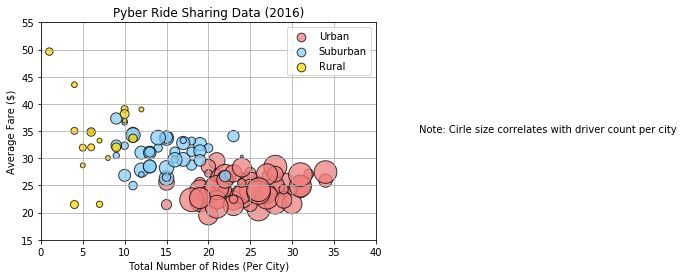

In [156]:
# Plot our scatter plots together and multiply size by a number to increase the size of the markers
urban = plt.scatter(urban_rides, average_urban_fare, marker = 'o', facecolors = 'lightcoral', edgecolors = 'black', s = urban_drivers*8, alpha = 0.75)
suburban = plt.scatter(suburban_rides, average_suburban_fare, marker = 'o', facecolors = 'lightskyblue', edgecolors = 'black', s = suburban_drivers*8, alpha = 0.75)
rural = plt.scatter(rural_rides, average_rural_fare, marker = 'o', facecolors = 'gold', edgecolors = 'black', s = rural_drivers*8, alpha = 0.75)
plt.xlim(0,40)
plt.ylim(15,55)
plt.xlabel('Total Number of Rides (Per City)')
plt.ylabel('Average Fare ($)')
plt.title('Pyber Ride Sharing Data (2016)')
legend = plt.legend((urban, suburban, rural), ('Urban', 'Suburban', 'Rural'), loc ='upper right')
# Make the markers in the legend the same siae
legend.legendHandles[0]._sizes = [75]
legend.legendHandles[1]._sizes = [75]
legend.legendHandles[2]._sizes = [75]
# Add text to the side of the plot
plt.figtext(1,.5, 'Note: Cirle size correlates with driver count per city')
# Add gridlines
plt.grid()
plt.show()

In [157]:
# Create variables that add the fare for each city type

urban_total_fare = urban_type['fare'].sum()

suburban_total_fare = suburban_type['fare'].sum()

rural_total_fare = rural_type['fare'].sum()


In [158]:
# Pie Chart-% of total fares by city type
labels = ['Urban', 'Suburban', 'Rural']

sizes = [urban_total_fare, suburban_total_fare, rural_total_fare]

colors = ['lightcoral', 'lightskyblue', 'gold']

explode = [0.075, 0, 0]

(-1.1165648204653278,
 1.1714863342490793,
 -1.1500420479185027,
 1.1156160518427185)

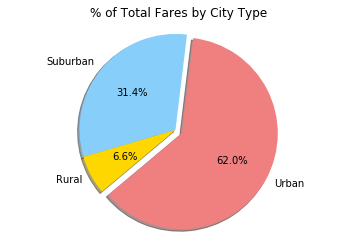

In [159]:
# Plot the pie chart
plt.pie(sizes, explode=explode, labels=labels
        , colors=colors, autopct='%1.1f%%'
        , shadow=True, startangle=220)
plt.title('% of Total Fares by City Type')
plt.axis("equal")

In [160]:
# Pie Chart-% of total rides by city type
urban_total_rides = urban_type['fare'].count()

suburban_total_rides = suburban_type['fare'].count()

rural_total_rides = rural_type['fare'].count()

sizes = [urban_total_rides, suburban_total_rides, rural_total_rides]

(-1.1111841253438814,
 1.1909410154026123,
 -1.140876034947668,
 1.0920471062857113)

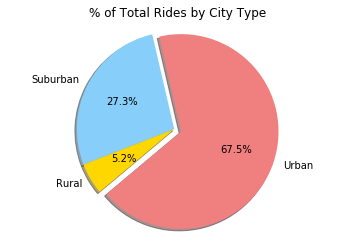

In [161]:
plt.pie(sizes, explode=explode, labels=labels
        , colors=colors, autopct='%1.1f%%'
        , shadow=True, startangle=220)
plt.title('% of Total Rides by City Type')
plt.axis("equal")

In [162]:
# Pie Chart-% of Total Drivers by City Type
urban_total_drivers = urban_drivers.sum() 

suburban_total_drivers = suburban_drivers.sum()

rural_total_drivers = rural_drivers.sum()


In [163]:
sizes = [urban_total_drivers, suburban_total_drivers, rural_total_drivers]

(-1.118796066404444,
 1.1799140752474053,
 -1.1036109324981351,
 1.1037293838003295)

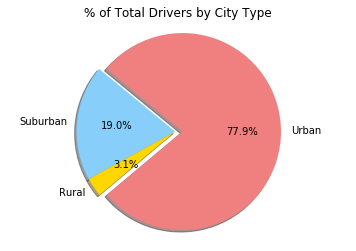

In [164]:
plt.pie(sizes, explode=explode, labels=labels
        , colors=colors, autopct='%1.1f%%'
        , shadow=True, startangle=220)
plt.title('% of Total Drivers by City Type')
plt.axis("equal")